## Project Name: - Obesity Prediction

### 1.1 1) Problem Statement

- This Dataset comprises of obesity levels of individuals from Kaggle
- It stores charactecteristics about the indivuals such as their gender, age, height and weight
- It also stores other factors that each indiviual has that may have led to them having and not having obesity
- A user can predict how different factors can lead to obesity

### 1.1.1 Import Required Library

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1.2 Loading Obesity Data

In [2]:
df = pd.read_csv('obesity.csv')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.shape

(2111, 17)

Dataset has 2111 samples and 17 features

#### Summary of Dataset

In [4]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
lst = list(df.columns)
lst

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [9]:
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [10]:
print("Missing values distrubution: ")
print(df.isnull().mean())

Missing values distrubution: 
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64


### 1.2 2) Data Exploring

In [11]:
df['Age'] = df['Age'].astype(int)
df['Weight'] = df['Weight'].round(decimals=2)
df['Height'] = df['Height'].round(decimals=2)
df['CH2O'] = df['CH2O'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['TUE'] = df['TUE'].astype(int)

In [12]:
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
Gender                             object
Age                                 int32
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                                int32
SCC                                object
FAF                                 int32
TUE                                 int32
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [13]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III


### 1.2.1 Feature Information

- **Gender**: The gender of each individual
- **Age**: The age of each individual
- **Height**: The height of each individual in meters
- **family_history_with_overweight**: Whether the indiviual has a family history of overweight relatives

- **FAVC**: Frequent consumption of high caloric food

- **FCVC**: Frequency of consumption of vegetables 

- **NCP**: Number of main meals 

- **CAEC**: Consumption of food between meals 

- **CH20**: Consumption of water daily 

- **CALC**: Consumption of alcohol 

- **SCC**: Calories consumption monitoring 

- **FAF**: Physical activity frequency 

- **TUE**: Time using technology devices 

- **MTRANS**: Transportation used 

In [14]:
df.value_counts()

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  CAEC        SMOKE  CH2O  SCC  FAF  TUE  CALC        MTRANS                 NObeyesdad         
Male    21   1.62    70.00   no                              yes   2.0   1.0  no          no     3     no   1    0    Sometimes   Public_Transportation  Overweight_Level_I     15
Female  21   1.52    42.00   no                              yes   3.0   1.0  Frequently  no     1     no   0    0    Sometimes   Public_Transportation  Insufficient_Weight     4
        25   1.63    104.84  yes                             yes   3.0   3.0  Sometimes   no     2     no   0    0    Sometimes   Public_Transportation  Obesity_Type_III        3
Male    21   1.71    75.00   yes                             yes   2.0   3.0  Sometimes   no     1     no   1    0    Sometimes   Public_Transportation  Overweight_Level_I      3
             1.72    80.00   yes                             yes   2.0   3.0  Sometimes   no     2     no   2  

In [15]:
df.count()

Gender                            2111
Age                               2111
Height                            2111
Weight                            2111
family_history_with_overweight    2111
FAVC                              2111
FCVC                              2111
NCP                               2111
CAEC                              2111
SMOKE                             2111
CH2O                              2111
SCC                               2111
FAF                               2111
TUE                               2111
CALC                              2111
MTRANS                            2111
NObeyesdad                        2111
dtype: int64

### Prepocessing the Data

The dataset is fairly clean. The only values that need to be fixed in the data types for some of the column data

In [16]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2,no,1,0,Sometimes,Public_Transportation,Obesity_Type_III


## Visualizing the Data

In [17]:
sorted(df['NObeyesdad'].unique())

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

The following bar graph gives a visual representation of the distrubution of weight categories for the dataset. It can be observed that the most common weight category is Obesity Type I, howvever the the number for the other weight categories are not far behind.

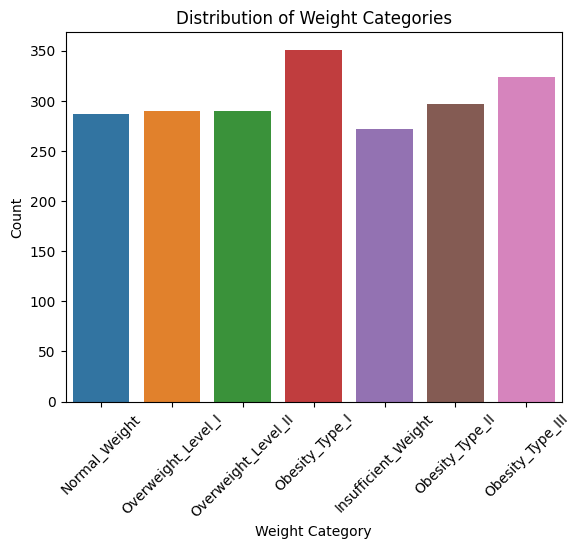

In [21]:
sns.countplot(data=df, x="NObeyesdad")

plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.title('Distribution of Weight Categories')
plt.xticks(rotation=45)

plt.show()

A comparative analysis was conducted to assess the prevalence of overweight among males and females, categorized by Overweight Type 1 and Overweight Type 2. The results indicate that the disparity between the genders with Overweight Type 1 is negligible. However, a substantial difference was observed for Overweight Type 2, where the number of males falling under this category was more than twice the number of females.

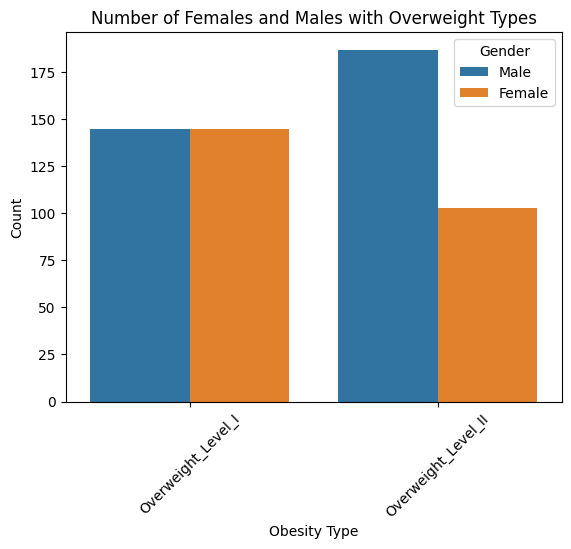

In [19]:
# filter the data by NObeyesdad and Gender
obese_data = df[df['NObeyesdad'].isin(['Overweight_Level_I', 'Overweight_Level_II'])]
obese_by_gender = obese_data.groupby(['Gender', 'NObeyesdad']).size()

# create the countplot 
sns.countplot(x='NObeyesdad', hue='Gender', data=obese_data)
plt.xticks(rotation=45)

# set the labels and title
plt.xlabel('Obesity Type')
plt.ylabel('Count')
plt.title('Number of Females and Males with Overweight Types')

# display the plot
plt.show()

Another comparative analysis was conducted to assess the prevalence of obesity among males and females, categorized by Obesity Type I, Obesity Type II and Obesity Type III. The results indicate that the disparity between the genders with Obesity Type 1 is negligible. 

Interestingly, a substantial difference was observed for Obesity Type 2, where there was less than fifty(50) women with Obesity Type 2 but the number of males that fell under this category was over two hundred and fifty (250). 

For Obesity Type III, it was noticed that the results have reverse in comparison to Obesity Type II where there was less than fifty(50) men with Obesity Type 2 but the number of females that fell under this category was over two hundred and fifty (250). 

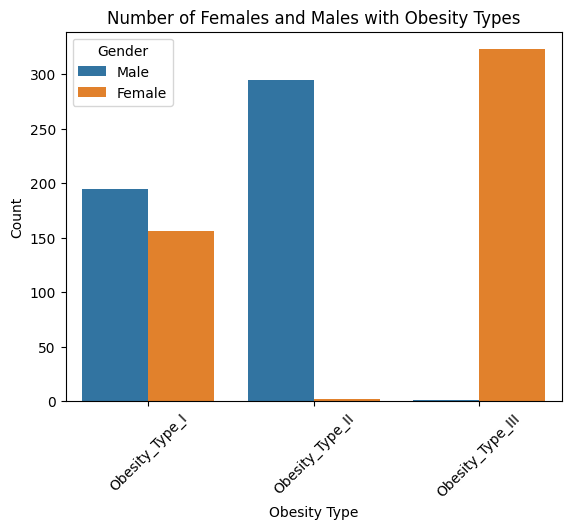

In [20]:
# filter the data by NObeyesdad and Gender
obese_data = df[df['NObeyesdad'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])]
obese_by_gender = obese_data.groupby(['Gender', 'NObeyesdad']).size()

# create the countplot 
sns.countplot(x='NObeyesdad', hue='Gender', data=obese_data)
plt.xticks(rotation=45)

# set the labels and title
plt.xlabel('Obesity Type')
plt.ylabel('Count')
plt.title('Number of Females and Males with Obesity Types')

# display the plot
plt.show()